<a href="https://colab.research.google.com/github/jsnyder82/jsnyder82/blob/main/Lecture_22_Simulation_based_Inference_Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 22 - Simulation-based Inference - Bootstrapping**

---

<br>

### Packages

In [ ]:
# none

<br>

<br>

---

<br>

### Introduction

* Thus far, in this class, we have learned to

  * Import our data into an application or coding environment
    * `.csv`, `.json`, web scraping, etc.

  * Clean/wrangle/organize our data for analysis
    * Subsetting, writing functions, merging data, extracting data from text, etc.

  * Summarize our data using basic descriptive statistics
    * Central tendency and variability

  * Visualize our data to understand distributions and relationships
    * Scatterplots, `ggplot2`, etc.

<br>

* ***Congratulations!***

* We can use what we have learned to perform a basic analysis of a dataset!

<br>

* However, note that our descriptive statistics often only characterize a sample of data taken from a larger population

* To understand (i.e. infer) characteristics of an entire population from a sample, we require a new concept

  * ***Statistical inference*** - Inferring quantities about a population using a sample from the population while accounting for "sampling variability"

<br>

* Let's first explore this concept of ***sampling variability***

<br>

<br>

---

<br>

### Sampling Variability

#### Need for Sampling

* In practice, data scientists and statisticians are interested in characteristics of a population - this is most often the ***mean***!

  * Average calorie consumption among ALL first-time undergraduate students

  * Average amount of emphysema among ALL long-time smokers
  
  * Average test scores among ALL students underrepresented in STEM fields

<br>

* However, we are often unable to collect data on the entire population

  * Can we collect dietary data on ALL undergraduate students in the entire country?

  * Can we do a CT scan on ALL long-time smokers in the world?
  
  * Can we provide the same test to ALL students in the country?

<br>

* So what do we do?

<br>

* We can randomly sample a subset of the population

* Use the mean of the sample to estimate the mean of the population

<img src="https://s3-eu-west-1.amazonaws.com/blog.omniconvert.com-media/blog/wp-content/uploads/2019/10/21150245/sample-size-definition.png" width="500" >

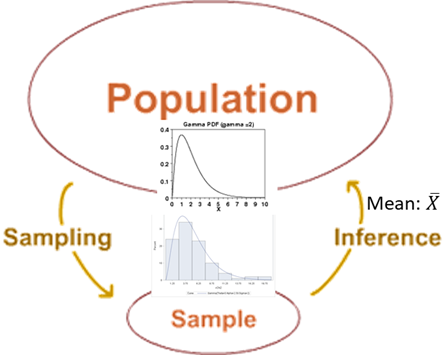

<br>



---




#### Scenario

* Imagine you are a researcher in education proposing a new placement test for college students

* You would like to estimate the average math score for this test

<br>

* Can we offer this test to ALL students?
  * What if it is a bad test? If we provide the test to everyone, a lot of money is wasted
  * Some students may opt out of taking the test
  * Offering to prospective test to ALL students may not be feasible

<br>

* What can we do?

<br>

  * We can randomly sample college students from the population
  * Use the average math score in the sample to estimate the average math score in the population



<br>



---




#### Example Population

* For illustration, we will assume we know the
  * **true** population mean math score
    * $\mu = 66.09$
  * **true** population standard deviation of math scores
    * $\sigma = 15.16$

<br>

* $\mu$ or mu is pronounced 'myu'
* $\sigma$ is pronounced 'sigma'

<br>

* Load our population data (we usually don't have this!)

In [ ]:
# The entire population
population <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/StudentsPerformance.csv")[, c("math.score")]
population <- data.frame(math.score = population)

# show first few lines
head(population)

,math.score
,<int>
1,72
2,69
3,90
4,47
5,76
6,71


<br>

* Population size (typically unknown)

In [ ]:
# population size
N <- nrow(population)
N

[1] 1000

<br>

* Population mean (typically unknown)

In [ ]:
# population mean
mu <- mean(population$math.score)
mu

[1] 66.089

<br>

* Population standard deviation (typically unknown)

In [ ]:
# population standard deviation
stdev <- sd(population$math.score)
stdev

[1] 15.16308

<br>

* Population distribution (typically unknown)

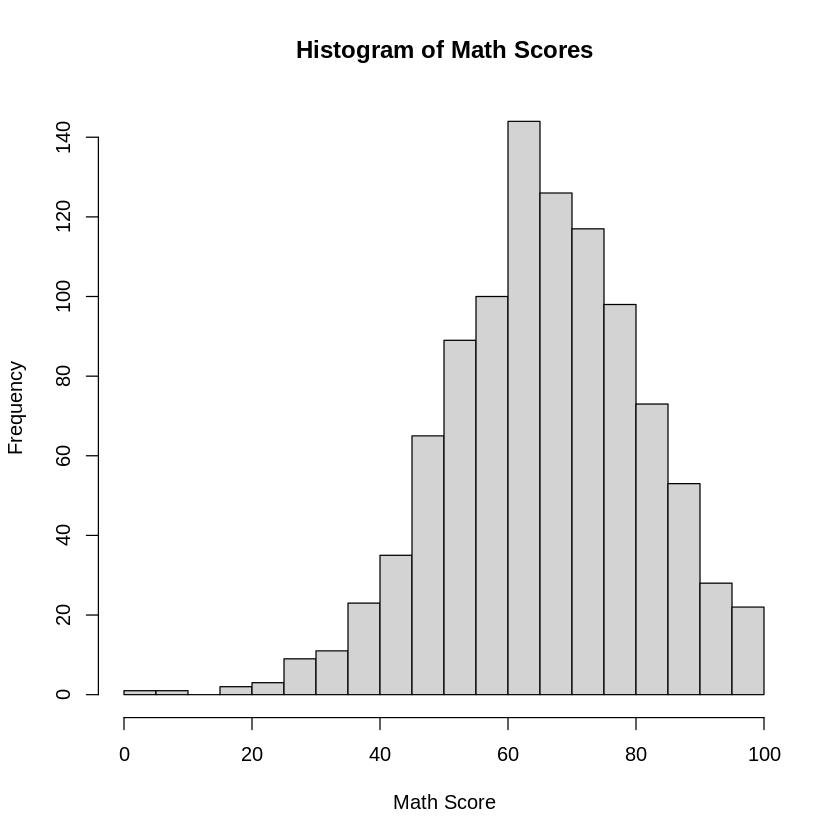

In [ ]:
hist(population$math.score, breaks = 30,
     main = "Histogram of Math Scores",
     xlab = "Math Score")

<br>



---




#### Taking Our Sample

* Let's simulate taking a random sample of 50 students from our population

* We can do this using the `sample()` function

* The script below takes a random sample of `size = 50` from the numeric vector `population$math.score` without replacement

* "Without replacement" (`replace = FALSE`) means we cannot sample the same individual more than once

In [ ]:
set.seed(85862)  # ignore

math_sample <- sample(population$math.score, size = 50, replace = FALSE)
math_sample

[1] 53 61 35 69 51 60 36 53 35 42 62 65 35 70 57 58 69 78 48 47 77 38 35 40 47
[26] 91 79 47 24 46 67 65 58 50 69 59 65 58 65 68 49 61 53 59 46 43 58 46 87 69

<br>

* Calculate our sample mean, which estimates our true (unknown) population mean

In [ ]:
# calculate sample mean (xbar)
xbar <- mean(math_sample)
xbar

[1] 56.06

* The sample mean is denoted by $\bar{X}$, pronounced (x-bar)

* Is this average ($\bar{X}$) close to the true population mean ($\mu = 66.09$)?

* This sample could be misleading...


<br>

* Let's try taking another random sample of 50 students from our population

In [ ]:
set.seed(1)  # ignore

# random sample
math_sample <- sample(population$math.score, size = 50, replace = FALSE)

# calculate sample mean
xbar        <- mean(math_sample)
xbar

[1] 67.14

* Is this average $\bar{X}$ close to the true population mean ($\mu = 66.09$)?

<br>

* What we are observing is ***sampling variability***
  * i.e. Estimates of the average (and other statistics) can change from sample to sample

<br>

* Let's try sampling 50 students over and over again to observe the distribution of the sample mean

In [ ]:
set.seed(2)  # ignore

# number of samples
n_samp = 500

# empty vector to store all the sample means
sample_means <- vector(length = n_samp)

# loop to calculate many sample means
for (i in 1:n_samp) {

  # bootstrap sample of size n
  math_sample <- sample(population$math.score, size = n_samp, replace = FALSE)

  # compute mean of single bootstrap sample
  sample_mean <- mean(math_sample)

  # store the bootstrap mean
  sample_means[i] <- sample_mean

}

In [ ]:
# our sample means
print(head(sample_means, 100))

  [1] 66.406 66.258 66.550 66.346 65.366 66.024 66.142 65.692 66.756 65.950
 [11] 66.116 66.586 66.054 65.736 66.942 66.234 65.818 66.216 66.188 66.148
 [21] 66.622 65.566 65.090 66.476 66.598 65.624 65.338 66.822 66.088 66.432
 [31] 66.346 65.808 65.314 65.870 66.022 65.986 65.764 65.956 66.344 64.700
 [41] 66.130 67.120 67.024 66.566 66.118 65.226 66.684 66.212 66.242 66.540
 [51] 66.256 65.834 66.068 65.550 66.236 66.430 66.678 65.908 66.092 66.656
 [61] 66.216 65.602 65.566 65.148 66.096 66.714 66.678 65.964 65.520 66.576
 [71] 65.968 65.590 66.402 65.732 65.980 65.232 65.534 66.266 66.068 66.458
 [81] 66.594 66.254 65.992 65.968 65.822 66.144 65.050 66.346 65.938 66.512
 [91] 66.522 66.696 66.146 66.356 66.360 65.712 66.144 65.728 66.110 66.030


<br>

* We can now plot the distribution of these samples means using a histogram

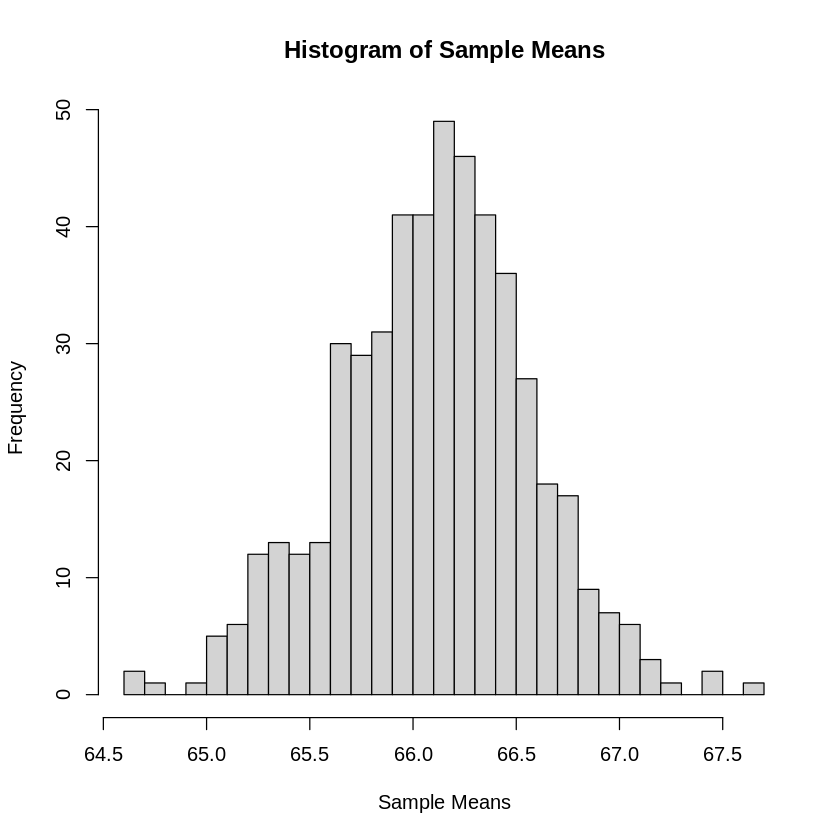

In [ ]:
hist(sample_means, breaks = 30,
     main = "Histogram of Sample Means",
     xlab = "Sample Means")

* The histogram above shows the distribution of possible sample means if we took many random samples

* This is called the ***sampling distribution*** of our sample mean $\bar{X}$

* This illustrates that the sample mean varies from sample to sample
  * In practice we only take one sample, so this is NOT observed

<br>

* The histogram suggests we are unable to simply say the mean of a single sample is the population mean since the sample mean can change from sample to sample

<br>

* What are our options then?

  * Instead, we can incorporate our understanding of how the sample mean changes from sample to sample

  * That is, we "infer" properties (i.e. mean) of the population based on our understanding of sampling variability

  * This process is called "statistical inference"

<br>

* Statistical inference is performed using

  * Confidence intervals

  * Hypothesis testing

<br>

* For calculation, statistical inference is performed using

  * Conventional (theory-based) approaches

  * Simulation-based approaches

<br>

* You will have plenty of time to learn conventional statistical inference in your other classes

* Today we will cover a simulation-based approach to creating confidence intervals

<br>

<br>



---




### Confidence Intervals from the Sampling Distribution

* Below is the same histogram but with the true population mean and average of samples means on the same plot

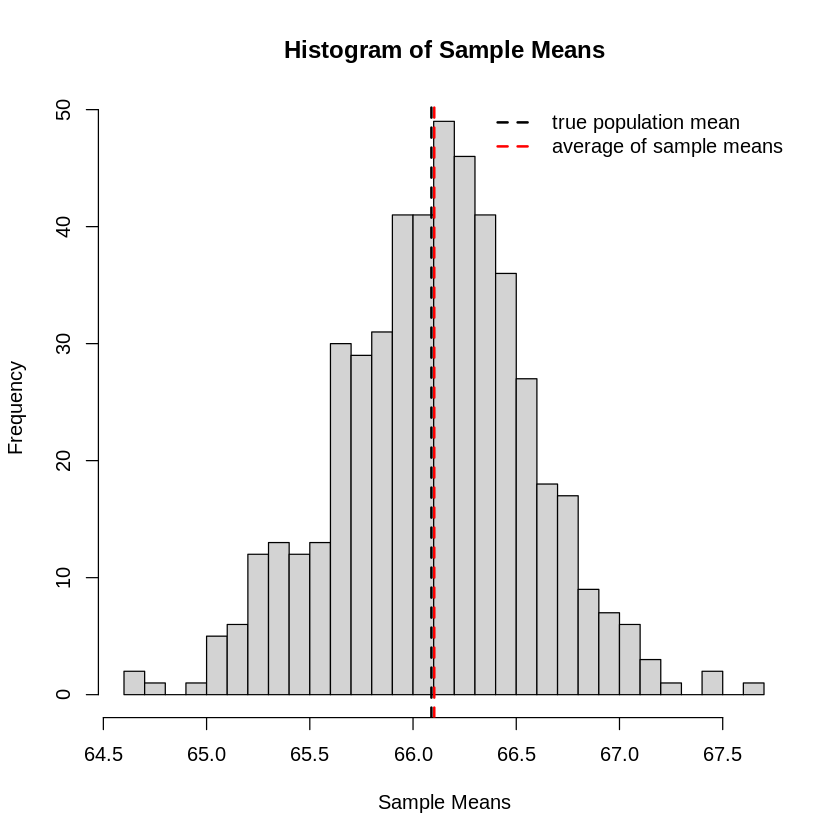

In [ ]:
# Histogram of sample means
hist(sample_means, breaks = 30,
     main = "Histogram of Sample Means",
     xlab = "Sample Means")

# ignore below (base R plotting)
abline(v = mu, lty = 2, lwd = 2)
abline(v = mean(sample_means), lty = 2, lwd = 2, col = "red")
legend("topright",
       c("true population mean", "average of sample means"),
       lwd = 2, lty = 2, col = c("black", "red"), bty = "n")

* What do we notice?

  * The average of all the samples means is approximately the true population mean!

  * That is, the center of the sampling distribution of $\bar{X}$ is approximately the true population mean $\mu$

<br>

* Why do we care?

  * If we had the sampling distribution (typically do not have), we could compute a lower and upper bound that contains the center (true population mean $\mu$) with a certain probability

<br>

* For example,

  * We could calculate the 2.5% (lower bound) and 97.5% (upper bound) percentiles

  * These percentiles contain 95% of the distribution

  * i.e. The true population mean is between the 2.5% and 97.5% percentiles with 95% probability



In [ ]:
# calculate 2.5% and 97.5% percentiles
bounds <- quantile(sample_means, probs = c(0.025, 0.975))
print(bounds)

# save each interval boundary
lower  <- bounds[1]
upper  <- bounds[2]

    2.5%    97.5% 
65.19695 66.99480 


<br>

* Visualize the interval on the histogram

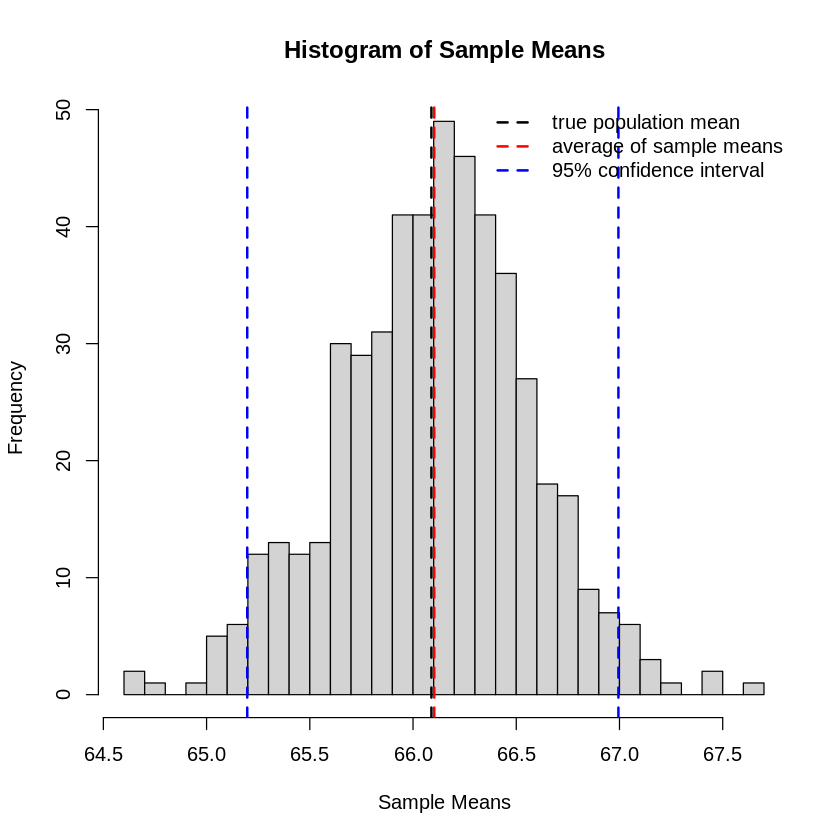

In [ ]:
# Histogram of sample means
hist(sample_means, breaks = 30,
     main = "Histogram of Sample Means",
     xlab = "Sample Means")

# ignore below (base R plotting)
abline(v = mu, lty = 2, lwd = 2)
abline(v = mean(sample_means), lty = 2, lwd = 2, col = "red")
abline(v = lower, lty = 2, lwd = 2, col = "blue")
abline(v = upper, lty = 2, lwd = 2, col = "blue")
legend("topright",
       c("true population mean", "average of sample means",
       c("95% confidence interval")),
       lwd = 2, lty = 2, col = c("black", "red", "blue"), bty = "n")

* This is known as a confidence interval

* The interpretation is

  * We are 95% confident that the true population mean math score is in the interval [65.2, 67.0]

<br>

<br>



---




### Bootstrapping for Confidence Interval Estimation

* Remember, we don't have the true sampling distribution of the sample mean

* However, we can simulate a sampling distribution using a process called
 ***bootstrapping***

* In bootstrapping, we "pretend" our sample is our population

* We can repeatedly sample from our sample ***with replacement*** to gain an understanding of our sampling distribution

<br>

* The bootstrapping procedure for confidence intervals is performed as follows

  1. Let `n` be the size of our sample. We first randomly sample `n` observations ***with replacement*** from our sample data. This is called a bootstrapped sample

  2. Compute the statistics in which we are interested (e.g., mean) on this bootstrapped sample and save

  3. Repeat steps 1 and 2 many times (e.g., `B > 500`). For example, if `B = 1000` This will produce `B = 1000` mean estimates

  3. Compute lower (e.g., 2.5%) and upper (97.5%) percentiles of your `B = 1000` means, which define our (95%) confidence interval

<br>

#### Bootstrapping Procedure

* Let's do an example with the dataset of math scores

* Remember that we are considering the entire math score dataset as the population

* In practice, this is typically not possible, so let's take a random sample of size `n = 50` from the population

In [ ]:
set.seed(2)  # ignore

# random sample of size 50
data <- sample(population$math.score, size = 50, replace = FALSE)
print(data)

 [1]  87  54  42  62  84  77  47  75  60  57  80  46  93  55  56  72  94  77  76
[20]  61  84  49  74  64  76  88  48  82 100  59  62  79  53  62  70  57  50  64
[39]  91  65  71  64  59  37  65  50  73  87  51  93


In [ ]:
# store our sample size
n <- length(data)
n

[1] 50

<br>

<br>

* **Step 1:** Randomly sample `n` observations with replacement from our sample

  * Since we are sampling WITH replacement, note that some individuals in our bootstrapped sample may appear more than once or not at all!

In [ ]:
# bootstrap sample of size n
boot_samp <- sample(data, size = 50, replace = TRUE)
boot_samp

[1] 77 42 42 87 74 87 71 65 56 53 77 75 57 65 59 50 62 84 93 47 93 64 37 61 82
[26] 62 60 64 73 93 77 79 56 93 70 75 79 93 94 84 64 51 60 56 57 94 51 72 84 80

<br>

* **Step 2:** Compute the statistics in which we are interested

  * We'll compute the mean

In [ ]:
# compute mean of random sample
boot_mean <- mean(boot_samp)
boot_mean

[1] 69.62

<br>

* **Step 3:** Repeat steps 1 and 2 many times (e.g., `B > 500`).

  * Let's use `B = 1000` bootstrap samples.
  * We can calculate the 1000 bootstrap sample means using a `for` loop

In [ ]:
# number of bootstrap samples
B <- 1000

# sample size
n <- length(data)

# compute B bootstrap means
boot_means <- vector(length = B)

# loop to calculate many bootstrap means
for (i in 1:B) {

  # bootstrap sample of size n
  boot_samp <- sample(data, size = n, replace = TRUE)

  # compute mean of single bootstrap sample
  boot_mean <- mean(boot_samp)

  # store the bootstrap mean
  boot_means[i] <- boot_mean

}

<br>

* Plotting a histogram of the bootstrap means, we observe an estimate of the sampling distribution of the sample mean

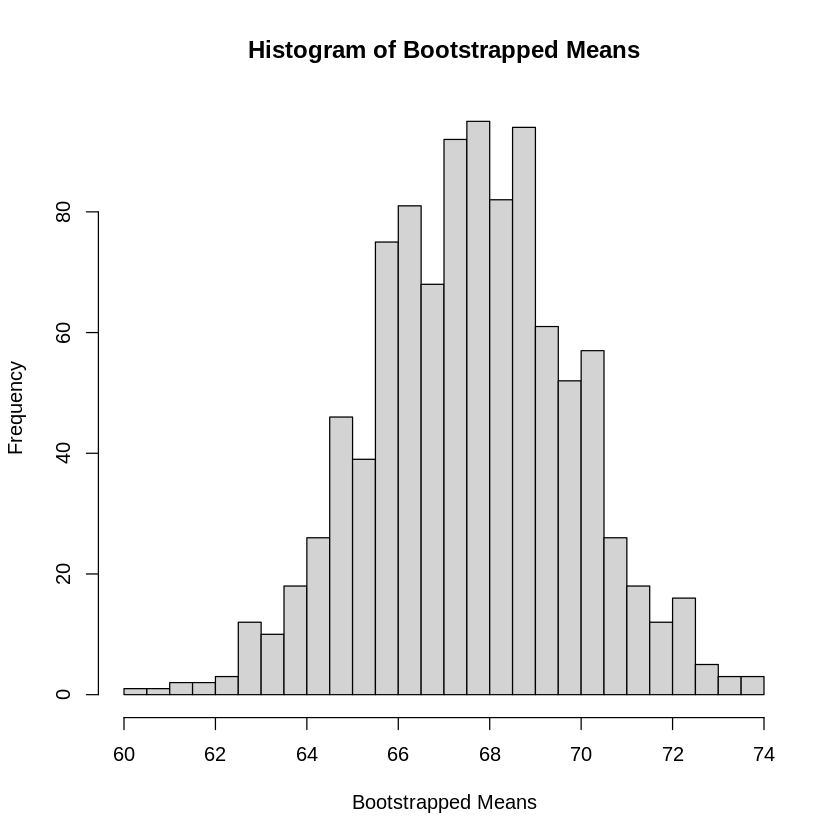

In [ ]:
hist(boot_means, breaks = 30,
     main = "Histogram of Bootstrapped Means",
     xlab = "Bootstrapped Means")

<br>

#### Bootstrap Confidence Interval

* Using this distribution, we can now compute percentiles

* We compute the 2.5% (`0.025`) and 97.5% (`0.975`) percentiles

* This forms a 95% confidence interval (97.5% - 2.5% = 95%)

In [ ]:
# compute 95% confidence interval
print(quantile(boot_means, probs = c(0.025, 0.975)))

 2.5% 97.5% 
63.26 72.04 


<br>

* We interpret the 95% bootstrap confidence interval as follows

  * We are 95% confident that the true population mean math score is within the interval [63.26, 72.04]

  * In other words, there is a high probability that the true population mean math score is between 63.26 and 72.04

<br>

* If this mean math score is acceptable for the proposed standardized math test, we can move forward with its implementation on a larger scale

<br>

<br>



---




### Statistical Inference using a Confidence Interval

* The purpose of a confidence interval is to provide a set of bounds that contain the true population average with a level of confidence (95%)

* In practice, we can use confidence intervals to perform statistical testing

  * That is, we can use a confidence interval to determine if the true population mean is greater than or less than (or different than) a certain value with some probability





<br>

* From the interval below, we know that the true population average math score is contained in the interval with 95% probability

* Since we are highly confident (95%) that the true mean is inside the interval,
  * we say the true mean is ***significantly*** different from values ***outside*** interval
  * we say the true mean is ***not significantly*** different from values ***inside*** interval

In [ ]:
# compute 95% confidence interval
print(quantile(boot_means, probs = c(0.025, 0.975)))

 2.5% 97.5% 
63.26 72.04 


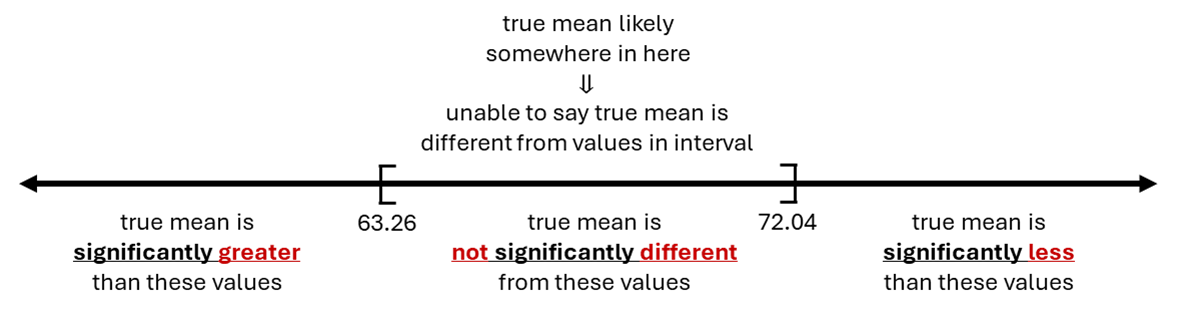

<br>

* From the prior scenario, what if we require the math test to have an average greater than 60 points?

* Since the score of 60 is below the lower bound of the interval, we say
  * "Based on the 95% confidence interval, the true population average math score is ***significantly*** greater than 60 points"
    OR
  * "Based on the 95% confidence interval, the true population average math score is ***significantly*** different than 60 points"

<br>

* This concept leads us into hypothesis testing, which we will cover next lecture!

<br>

More examples interpretations:

* "The true population average math score is ***significantly*** less than 73 points"

* "The true population average math score is NOT ***significantly*** different than 72 points"

* "The true population average math score is NOT ***significantly*** different than 65 points"

In [ ]:
# compute 95% confidence interval
print(quantile(boot_means, probs = c(0.025, 0.975)))

 2.5% 97.5% 
63.26 72.04 


<br>

<br>